# Klasifikasi Resiko Kehamilan pada Ibu Mengandung Menggunakan Algoritma Naive Bayes: Studi Kasus pada Dataset Puskesmas Malaka Jaya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB

## Metadata

- Dataset yang digunakan merupakan data kesehatan ibu hamim yang diambil dari puskesmas malaka jaya pada tahun 2022. 
- Dataset ini berukuran yaitu 793 Baris dan 25 kolom dari A - Y.
- Dataset ini terdiri dari 25 attributes.
- Dataset ini terdiri dari 24 features dan 1 data target yaitu RESIKO KEHAMILAN.
- Dataset ini dapat digunakan untum melakukan klasifikasi resiko kehamilan pada ibu yang sedang mengandung.
- Data targetnya dapat dikategorikan yaitu beresiko dan tidak beresiko.

## Exploratory Data Analysis

In [2]:
dataset = pd.read_excel('RESIKO KESEHATAN IBU HAMIL TAHUN 2022.xlsx')

In [3]:
dataset

,NO,TANGGAL,NO REGISTER,PASIEN BARU/LAMA,NAMA BUMIL,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),ALAMAT LENGKAP,KTP DKI /NON /NIK,BPJS /NON BPJS / NO,...,LiLA (cm),HB,KETERANGAN K1 MURNI,KETERANGAN K1 AKSES,HPHT,TP,TT,FE,RESIKO KEHAMILAN,KETERANGAN
0,1,2022-03-01 00:00:00,002/22,Baru,Serli Yanah,27,38,Jl. Mawar Merah 7/2/30 RT 1/7,3303054806950001,0002485029532,...,28.0,11.2,-,ya,2021-06-04 00:00:00,13-1-2022,T5,Vitamin ada,NaN,th/ lanjut
1,2,NaN,165/21,Lama,Shabrina Adzari,28,37,Jl. BR 9/135 RT 4/6,3175074102930004,0000036927202,...,30.0,8.9,-,-,16-4-2021,23-1-2022,T1,Vitamin ada,NaN,Rujuk bunda Aliyah dengan anemia dan letak obl...
2,3,NaN,132/21,Lama,Yulita Anggraini,23,38,JL. BR 10/1/16 RT 12/6,3175076807980006,-,...,27.0,11.7,-,-,2021-11-04 00:00:00,18-1-2022,T2,10,NaN,"Inj TD3, th/ lanjut, cek lab"
3,4,NaN,195/21,Lama,Sinta Nur Rahmah,24,25,JL NI 4 RT 10/4,3175074307970006,0000371009002,...,28.0,NaN,-,-,2021-05-07 00:00:00,2022-12-04 00:00:00,T3,30,NaN,NaN
4,5,NaN,169/21,Lama,Yulita Indriyani,25,34,"JL. Rawadas, Gg. Madrasah RT 7/3, Pondok Kopi",1671134107960095,-,...,28.0,NaN,-,-,2021-05-05 00:00:00,2022-12-02 00:00:00,T0,Vitamin ada,NaN,th/ lanjut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,789,NaN,223/22,lama,Lhutfia Ismira,25,27,JL. Bojong Rangkong RT 8/3,3175074705970003,0001609684795,...,26.0,12.6,-,V,20-6-2022,27-3-2023,T3,30,NaN,"SF, Kalk, Asam Folat, Vit C"
789,790,NaN,600/22,Baru,Mut Mainah,31,18,"JL. Mawar Merah 4/6/115 , RT. 003/012",3175074505910007,0001146121086,...,28.0,NaN,-,V,26-8-2022,2023-02-06 00:00:00,T3,30,Beresiko,"SF, Asam Folat, Vit. B6, Kalk"
790,791,NaN,469/22,Lama,Ranggaini Rapama,22,37,JL. Nusa Indah 4/5/No. 193 RT 6/4,1213065810990001,0000233064911,...,31.0,NaN,-,-,15-4-2022,22-1-2023,T4,20,NaN,"INJ TD, SF, Kalk, C, Asam Folat"
791,792,NaN,443/22,Lama,Lutfiani Zulkarnaen,34,37,RSS BLOK 42 /1NO 2 RT 3/01,3175076401010006,0001291771394,...,22.0,NaN,-,-,15-4-2022,22-01-2023,T5,20,Beresiko,"SF, Asam Folat, Kalk, Vitamin C"


In [4]:
dataset.head()

,NO,TANGGAL,NO REGISTER,PASIEN BARU/LAMA,NAMA BUMIL,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),ALAMAT LENGKAP,KTP DKI /NON /NIK,BPJS /NON BPJS / NO,...,LiLA (cm),HB,KETERANGAN K1 MURNI,KETERANGAN K1 AKSES,HPHT,TP,TT,FE,RESIKO KEHAMILAN,KETERANGAN
0,1,2022-03-01 00:00:00,002/22,Baru,Serli Yanah,27,38,Jl. Mawar Merah 7/2/30 RT 1/7,3303054806950001,0002485029532,...,28.0,11.2,-,ya,2021-06-04 00:00:00,13-1-2022,T5,Vitamin ada,NaN,th/ lanjut
1,2,NaN,165/21,Lama,Shabrina Adzari,28,37,Jl. BR 9/135 RT 4/6,3175074102930004,0000036927202,...,30.0,8.9,-,-,16-4-2021,23-1-2022,T1,Vitamin ada,NaN,Rujuk bunda Aliyah dengan anemia dan letak obl...
2,3,NaN,132/21,Lama,Yulita Anggraini,23,38,JL. BR 10/1/16 RT 12/6,3175076807980006,-,...,27.0,11.7,-,-,2021-11-04 00:00:00,18-1-2022,T2,10,NaN,"Inj TD3, th/ lanjut, cek lab"
3,4,NaN,195/21,Lama,Sinta Nur Rahmah,24,25,JL NI 4 RT 10/4,3175074307970006,0000371009002,...,28.0,NaN,-,-,2021-05-07 00:00:00,2022-12-04 00:00:00,T3,30,NaN,NaN
4,5,NaN,169/21,Lama,Yulita Indriyani,25,34,"JL. Rawadas, Gg. Madrasah RT 7/3, Pondok Kopi",1671134107960095,-,...,28.0,NaN,-,-,2021-05-05 00:00:00,2022-12-02 00:00:00,T0,Vitamin ada,NaN,th/ lanjut


In [5]:
dataset.tail()

,NO,TANGGAL,NO REGISTER,PASIEN BARU/LAMA,NAMA BUMIL,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),ALAMAT LENGKAP,KTP DKI /NON /NIK,BPJS /NON BPJS / NO,...,LiLA (cm),HB,KETERANGAN K1 MURNI,KETERANGAN K1 AKSES,HPHT,TP,TT,FE,RESIKO KEHAMILAN,KETERANGAN
788,789,NaN,223/22,lama,Lhutfia Ismira,25,27,JL. Bojong Rangkong RT 8/3,3175074705970003,0001609684795,...,26.0,12.6,-,V,20-6-2022,27-3-2023,T3,30,NaN,"SF, Kalk, Asam Folat, Vit C"
789,790,NaN,600/22,Baru,Mut Mainah,31,18,"JL. Mawar Merah 4/6/115 , RT. 003/012",3175074505910007,0001146121086,...,28.0,NaN,-,V,26-8-2022,2023-02-06 00:00:00,T3,30,Beresiko,"SF, Asam Folat, Vit. B6, Kalk"
790,791,NaN,469/22,Lama,Ranggaini Rapama,22,37,JL. Nusa Indah 4/5/No. 193 RT 6/4,1213065810990001,0000233064911,...,31.0,NaN,-,-,15-4-2022,22-1-2023,T4,20,NaN,"INJ TD, SF, Kalk, C, Asam Folat"
791,792,NaN,443/22,Lama,Lutfiani Zulkarnaen,34,37,RSS BLOK 42 /1NO 2 RT 3/01,3175076401010006,0001291771394,...,22.0,NaN,-,-,15-4-2022,22-01-2023,T5,20,Beresiko,"SF, Asam Folat, Kalk, Vitamin C"
792,793,30/12/2022,603/22,Baru,Dini Hanifiani,27,40,"Kp. Jembatan RT 4/7, Penggilingan",3175067112950012,0001290157389,...,25.0,11.9,NaN,NaN,21-3-2022,28-12-2022,T3,Vitamin ada,Beresiko,"terapi Lanjut, Rujuk ke RSIA Bunda Aliyah"


In [6]:
dataset.sample(10)

,NO,TANGGAL,NO REGISTER,PASIEN BARU/LAMA,NAMA BUMIL,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),ALAMAT LENGKAP,KTP DKI /NON /NIK,BPJS /NON BPJS / NO,...,LiLA (cm),HB,KETERANGAN K1 MURNI,KETERANGAN K1 AKSES,HPHT,TP,TT,FE,RESIKO KEHAMILAN,KETERANGAN
438,439,NaN,396/22,Baru,Ade Ayu Anjani,25,41,Jl NI VI/I RT 07/RW03,3175075406970003,0001605810429,...,31.0,NaN,-,-,20-10-2021,27-7-2022,T2,NaN,Beresiko,Rujuk RS POST MATUR
76,77,NaN,130/21,L,YUNIARTI,33,35,JL BR 8/19 RT 02/06,3175064606890017,0001612368512,...,33.0,NaN,-,-,2021-08-06 00:00:00,15-03-2022,T4,NaN,Beresiko,RUJUK RSIA BUNDA ALIYAH
19,20,2022-11-01 00:00:00,184/21,LAMA,ERNAWATI DEWI,27,13,JL NI 1/9/143 RT 7 / RW 05,3175075908940001,0001216551374,...,25.0,NaN,-,-,2021-10-10 00:00:00,17-7-2022,T1,30,NaN,HASIL LAB ADA
0,1,2022-03-01 00:00:00,002/22,Baru,Serli Yanah,27,38,Jl. Mawar Merah 7/2/30 RT 1/7,3303054806950001,0002485029532,...,28.0,11.2,-,ya,2021-06-04 00:00:00,13-1-2022,T5,Vitamin ada,NaN,th/ lanjut
734,735,NaN,432/22,Lama,Melda sari,33,31,RUSUN KLENDER BLOK 48 LT 3 NO 12 RT 1/RW 1,3216024205890013,0001387913117,...,34.0,NaN,-,-,19-4-2022,26-01-2023,T4,30,Beresiko,terapi Lanjut
603,604,NaN,372/22,Lama,Sitty Masitha,24,16,JL Bunga Rampai ix/2RT 03/RW 10,3173076107970002,0001469163249,...,30.0,NaN,-,-,2022-10-06 00:00:00,17-3-2023,T1,30,NaN,"Sf, ASFOL, B6, C"
699,700,NaN,159/22,Lama,Lastuti,40,34,JL BR VII /5/ 101.RT 11/06,3201135704820001,00016314448448,...,29.0,NaN,-,-,13-03-2022,23-12-2022,T3,Vitamin ada,Beresiko,Terapi Lanjut
143,144,31-3-2022,87/22,LAMA,SITI HALIMATUS SADIYAH,35,36,JL BUNGA RAMPAI III NO 321 RT 15/ 9,32750460003870016,0002213677631,...,28.0,NaN,-,-,19-7-2021,26-4-2022,T4,15,NaN,THERAPI LANJUTKAN
389,390,18/7/2022,371/22,Baru,Nur Komalasari,37,6,"JL.NUSA INDAH 1/4/87, RT 3/12",3674065601850003,0001744583501,...,31.0,NaN,V,V,2022-05-06 00:00:00,2023-12-03 00:00:00,T0,30,Beresiko,"SF, Asfol, Vitamin C"
694,695,NaN,386/22,Lama,Dea Savitri,28,37,Jl Bunga Rampai 3/1no 3 RT 06/RW 09,3175074804940008,0002098574021,...,22.0,10.1,-,-,20-02-2022,27-11-2022,T3,Vitamin ada,Beresiko,"Rujuk ke RSIA Bunda Aliyah,Terapi Lanjut"


In [7]:
dataset.shape

(793, 25)

In [8]:
# Dapatkan daftar jenis semua kolom di dataset
dataset.dtypes

NO                           int64
TANGGAL                     object
NO REGISTER                 object
PASIEN BARU/LAMA            object
NAMA BUMIL                  object
UMUR (TAHUN)                 int64
USIA KEHAMILAN (MINGGU)      int64
ALAMAT LENGKAP              object
KTP DKI /NON /NIK           object
BPJS /NON BPJS / NO         object
NAMA SUAMI                  object
PEKERJAAN SUAMI             object
( G.. / P.. / A.. )         object
BB (kg)                    float64
TB (cm)                    float64
LiLA (cm)                  float64
HB                         float64
KETERANGAN K1 MURNI         object
KETERANGAN K1 AKSES         object
HPHT                        object
TP                          object
TT                          object
FE                          object
RESIKO KEHAMILAN            object
KETERANGAN                  object
dtype: object

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NO                       793 non-null    int64  
 1   TANGGAL                  193 non-null    object 
 2   NO REGISTER              790 non-null    object 
 3   PASIEN BARU/LAMA         792 non-null    object 
 4   NAMA BUMIL               793 non-null    object 
 5   UMUR (TAHUN)             793 non-null    int64  
 6   USIA KEHAMILAN (MINGGU)  793 non-null    int64  
 7   ALAMAT LENGKAP           793 non-null    object 
 8   KTP DKI /NON /NIK        792 non-null    object 
 9   BPJS /NON BPJS / NO      792 non-null    object 
 10  NAMA SUAMI               793 non-null    object 
 11  PEKERJAAN SUAMI          793 non-null    object 
 12  ( G.. / P.. / A.. )      793 non-null    object 
 13  BB (kg)                  791 non-null    float64
 14  TB (cm)                  7

In [10]:
dataset.columns

Index(['NO', 'TANGGAL', 'NO REGISTER', 'PASIEN BARU/LAMA', 'NAMA BUMIL',
       'UMUR (TAHUN)', 'USIA KEHAMILAN (MINGGU)', 'ALAMAT LENGKAP',
       'KTP DKI /NON /NIK', 'BPJS /NON BPJS / NO', 'NAMA SUAMI',
       'PEKERJAAN SUAMI', '( G.. / P.. / A.. )', 'BB (kg)', 'TB (cm)',
       'LiLA (cm)', 'HB', 'KETERANGAN K1 MURNI', 'KETERANGAN K1 AKSES', 'HPHT',
       'TP', 'TT', 'FE', 'RESIKO KEHAMILAN', 'KETERANGAN'],
      dtype='object')

In [11]:
dataset.isnull().sum()

NO                           0
TANGGAL                    600
NO REGISTER                  3
PASIEN BARU/LAMA             1
NAMA BUMIL                   0
UMUR (TAHUN)                 0
USIA KEHAMILAN (MINGGU)      0
ALAMAT LENGKAP               0
KTP DKI /NON /NIK            1
BPJS /NON BPJS / NO          1
NAMA SUAMI                   0
PEKERJAAN SUAMI              0
( G.. / P.. / A.. )          0
BB (kg)                      2
TB (cm)                      1
LiLA (cm)                    2
HB                         582
KETERANGAN K1 MURNI         96
KETERANGAN K1 AKSES         90
HPHT                        48
TP                          50
TT                          55
FE                          76
RESIKO KEHAMILAN           461
KETERANGAN                  14
dtype: int64

## Data Preprocessing

In [12]:
kolom_to_drop = ['NO', 'TANGGAL', 'NO REGISTER','NAMA BUMIL','ALAMAT LENGKAP',
       'KTP DKI /NON /NIK', 'BPJS /NON BPJS / NO', 'NAMA SUAMI','( G.. / P.. / A.. )',
       'KETERANGAN K1 MURNI', 'KETERANGAN K1 AKSES', 'HPHT', 'TP', 'KETERANGAN']
dataset = dataset.drop(kolom_to_drop, axis=1)

In [13]:
dataset.columns

Index(['PASIEN BARU/LAMA', 'UMUR (TAHUN)', 'USIA KEHAMILAN (MINGGU)',
       'PEKERJAAN SUAMI', 'BB (kg)', 'TB (cm)', 'LiLA (cm)', 'HB', 'TT', 'FE',
       'RESIKO KEHAMILAN'],
      dtype='object')

In [14]:
dataset.isnull().sum()

PASIEN BARU/LAMA             1
UMUR (TAHUN)                 0
USIA KEHAMILAN (MINGGU)      0
PEKERJAAN SUAMI              0
BB (kg)                      2
TB (cm)                      1
LiLA (cm)                    2
HB                         582
TT                          55
FE                          76
RESIKO KEHAMILAN           461
dtype: int64

In [15]:
dataset.shape

(793, 11)

In [16]:
column = 'PASIEN BARU/LAMA'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'PASIEN BARU/LAMA':
Lama     434
Baru     151
LAMA     103
L         41
BARU      29
B         17
baru      10
lama       4
LAMA       2
Baru       1
Name: PASIEN BARU/LAMA, dtype: int64


In [17]:
dataset = dataset.dropna(subset=['PASIEN BARU/LAMA'])

In [18]:
# Mengubah nilai-nilai tertentu menjadi 0 dan 1 pada kolom tertentu menggunakan replace()
dataset['PASIEN BARU/LAMA'] = dataset['PASIEN BARU/LAMA'].replace(['Lama', 'LAMA', 'L', 'lama', 
                                                                   'LAMA '], 0)
dataset['PASIEN BARU/LAMA'] = dataset['PASIEN BARU/LAMA'].replace(['Baru', 'BARU', 'B', 'baru', 
                                                                   'Baru '], 1)

In [19]:
dataset = dataset.dropna(subset=['UMUR (TAHUN)'])

In [20]:
# Melakukan encoding pada kolom 'PEKERJAAN SUAMI'
dataset['PEKERJAAN SUAMI'], _ = pd.factorize(dataset['PEKERJAAN SUAMI'])

In [21]:
dataset = dataset.dropna(subset=['BB (kg)'])

In [22]:
dataset = dataset.dropna(subset=['LiLA (cm)'])

In [23]:
mean_hb = dataset['HB'].mean()
dataset['HB'] = dataset['HB'].fillna(mean_hb)

In [24]:
column = 'TT'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'TT':
T2    225
T3    205
T1    133
T4    117
T5     36
T0     19
Name: TT, dtype: int64


In [25]:
dataset = dataset.dropna(subset=['TT'])

In [26]:
dataset['TT'] = dataset['TT'].replace(['T0', 'T1',
                                        'T2', 'T3', 
                                        'T4', 'T5'], 
                                        [0, 1, 2, 3, 4, 5])

In [27]:
column = 'FE'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'FE':
30             429
Vitamin ada    118
10              44
20              41
15              25
60              12
40               6
1                1
90               1
Name: FE, dtype: int64


In [28]:
# Menghapus baris dengan nilai 1 pada kolom 'FE'
dataset = dataset[dataset['FE'] != 1]

In [29]:
# Menghapus baris dengan nilai 1 pada kolom 'FE'
dataset = dataset[dataset['FE'] != 90]

In [30]:
# Mengganti nilai "Nan" dengan "Tidak Beresiko"
dataset['FE'].fillna('Tidak Perlu Vitamin', inplace=True)

In [31]:
# Melakukan encoding pada kolom 'PEKERJAAN SUAMI'
dataset['FE'], _ = pd.factorize(dataset['FE'])

In [32]:
column = 'RESIKO KEHAMILAN'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'RESIKO KEHAMILAN':
Beresiko    308
Name: RESIKO KEHAMILAN, dtype: int64


In [400]:
# Mengganti nilai "Nan" dengan "Tidak Beresiko"
dataset['RESIKO KEHAMILAN'].fillna('Tidak Beresiko', inplace=True)

In [401]:
column = 'RESIKO KEHAMILAN'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'RESIKO KEHAMILAN':
Tidak Beresiko    425
Beresiko          308
Name: RESIKO KEHAMILAN, dtype: int64


In [402]:
dataset['RESIKO KEHAMILAN'] = dataset['RESIKO KEHAMILAN'].replace(['Tidak Beresiko', 
                                                                   'Beresiko'],
                                                                   [0, 1])

In [403]:
print(dataset['RESIKO KEHAMILAN'].value_counts())

0    425
1    308
Name: RESIKO KEHAMILAN, dtype: int64


In [404]:
dataset.shape

(733, 11)

In [405]:
dataset.head()

,PASIEN BARU/LAMA,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),PEKERJAAN SUAMI,BB (kg),TB (cm),LiLA (cm),HB,TT,FE,RESIKO KEHAMILAN
0,1,27,38,0,66.5,150.0,28.0,11.200000,5,0,0
1,0,28,37,1,78.9,157.0,30.0,8.900000,1,0,0
2,0,23,38,0,66.2,156.0,27.0,11.700000,2,1,0
3,0,24,25,0,78.2,163.0,28.0,11.534597,3,2,0
4,0,25,34,0,85.6,158.0,28.0,11.534597,0,0,0


In [406]:
dataset.tail()

,PASIEN BARU/LAMA,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),PEKERJAAN SUAMI,BB (kg),TB (cm),LiLA (cm),HB,TT,FE,RESIKO KEHAMILAN
788,0,25,27,0,54.6,152.0,26.0,12.600000,3,2,0
789,1,31,18,0,74.2,150.0,28.0,11.534597,3,2,1
790,0,22,37,0,78.5,151.0,31.0,11.534597,4,5,0
791,0,34,37,4,51.0,156.0,22.0,11.534597,5,5,1
792,1,27,40,0,78.7,154.0,25.0,11.900000,3,0,1


In [407]:
dataset.sample(5)

,PASIEN BARU/LAMA,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),PEKERJAAN SUAMI,BB (kg),TB (cm),LiLA (cm),HB,TT,FE,RESIKO KEHAMILAN
466,1,35,33,4,74.9,158.0,29.0,11.900000,3,0,0
600,0,36,21,4,54.9,145.0,29.0,11.534597,1,2,1
471,1,27,22,17,52.1,160.0,22.0,11.534597,1,5,1
594,0,35,34,4,57.4,153.0,26.0,11.534597,3,2,1
379,1,33,22,0,69.3,158.0,30.0,11.534597,1,2,1


In [408]:
dataset.dtypes

PASIEN BARU/LAMA             int64
UMUR (TAHUN)                 int64
USIA KEHAMILAN (MINGGU)      int64
PEKERJAAN SUAMI              int64
BB (kg)                    float64
TB (cm)                    float64
LiLA (cm)                  float64
HB                         float64
TT                           int64
FE                           int64
RESIKO KEHAMILAN             int64
dtype: object

In [409]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 792
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PASIEN BARU/LAMA         733 non-null    int64  
 1   UMUR (TAHUN)             733 non-null    int64  
 2   USIA KEHAMILAN (MINGGU)  733 non-null    int64  
 3   PEKERJAAN SUAMI          733 non-null    int64  
 4   BB (kg)                  733 non-null    float64
 5   TB (cm)                  733 non-null    float64
 6   LiLA (cm)                733 non-null    float64
 7   HB                       733 non-null    float64
 8   TT                       733 non-null    int64  
 9   FE                       733 non-null    int64  
 10  RESIKO KEHAMILAN         733 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 68.7 KB


In [410]:
dataset.isnull().sum()

PASIEN BARU/LAMA           0
UMUR (TAHUN)               0
USIA KEHAMILAN (MINGGU)    0
PEKERJAAN SUAMI            0
BB (kg)                    0
TB (cm)                    0
LiLA (cm)                  0
HB                         0
TT                         0
FE                         0
RESIKO KEHAMILAN           0
dtype: int64

## Data Visualization

In [411]:
dataset.describe()

,PASIEN BARU/LAMA,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),PEKERJAAN SUAMI,BB (kg),TB (cm),LiLA (cm),HB,TT,FE,RESIKO KEHAMILAN
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,0.268759,29.888131,25.571623,16.305593,68.033288,156.200273,28.757844,11.533715,2.510232,2.084584,0.420191
std,0.443617,5.946807,9.933762,18.698483,14.564623,8.915640,4.172390,0.559152,1.176485,1.421323,0.493926
min,0.000000,13.000000,3.000000,0.000000,13.800000,0.800000,18.000000,7.900000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,18.000000,4.000000,57.400000,153.000000,26.000000,11.534597,2.000000,2.000000,0.000000
50%,0.000000,29.000000,28.000000,7.000000,66.600000,157.000000,29.000000,11.534597,2.000000,2.000000,0.000000
75%,1.000000,34.000000,34.000000,23.000000,78.200000,160.000000,32.000000,11.534597,3.000000,2.000000,1.000000
max,1.000000,46.000000,41.000000,65.000000,136.300000,170.000000,43.000000,14.500000,5.000000,7.000000,1.000000


Tidak Beresiko (0):  425
Beresiko (1):  308


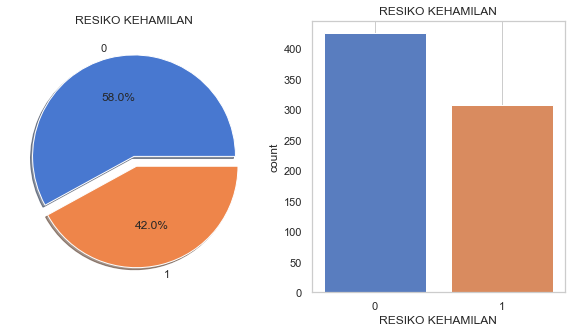

In [412]:
# KETERANGAN count plot
f, ax=plt.subplots(1,2, figsize=(10,5))
dataset['RESIKO KEHAMILAN'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%' ,ax=ax[0],shadow=True)
ax[0].set_title('RESIKO KEHAMILAN')
ax[0].set_ylabel('')
sns.countplot('RESIKO KEHAMILAN', data=dataset,ax=ax[1])
ax[1].set_title('RESIKO KEHAMILAN')
N,P=dataset['RESIKO KEHAMILAN'].value_counts()
print('Tidak Beresiko (0): ',N)
print('Beresiko (1): ',P)
plt.grid()
plt.show()

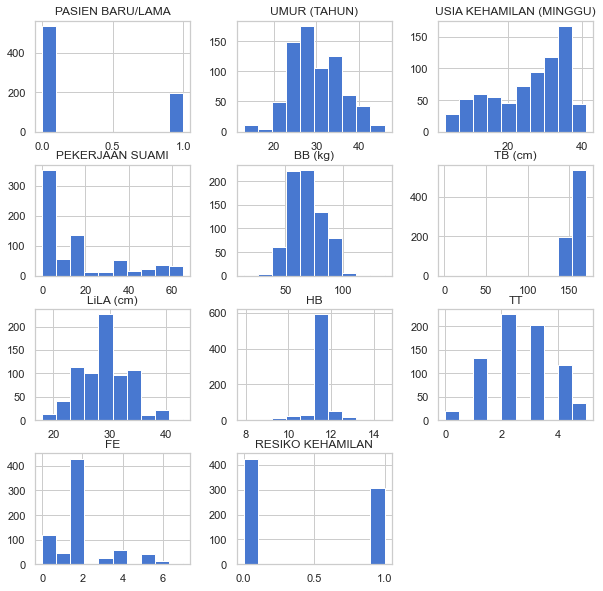

In [413]:
dataset.hist(bins=10,figsize=(10,10))
plt.show()

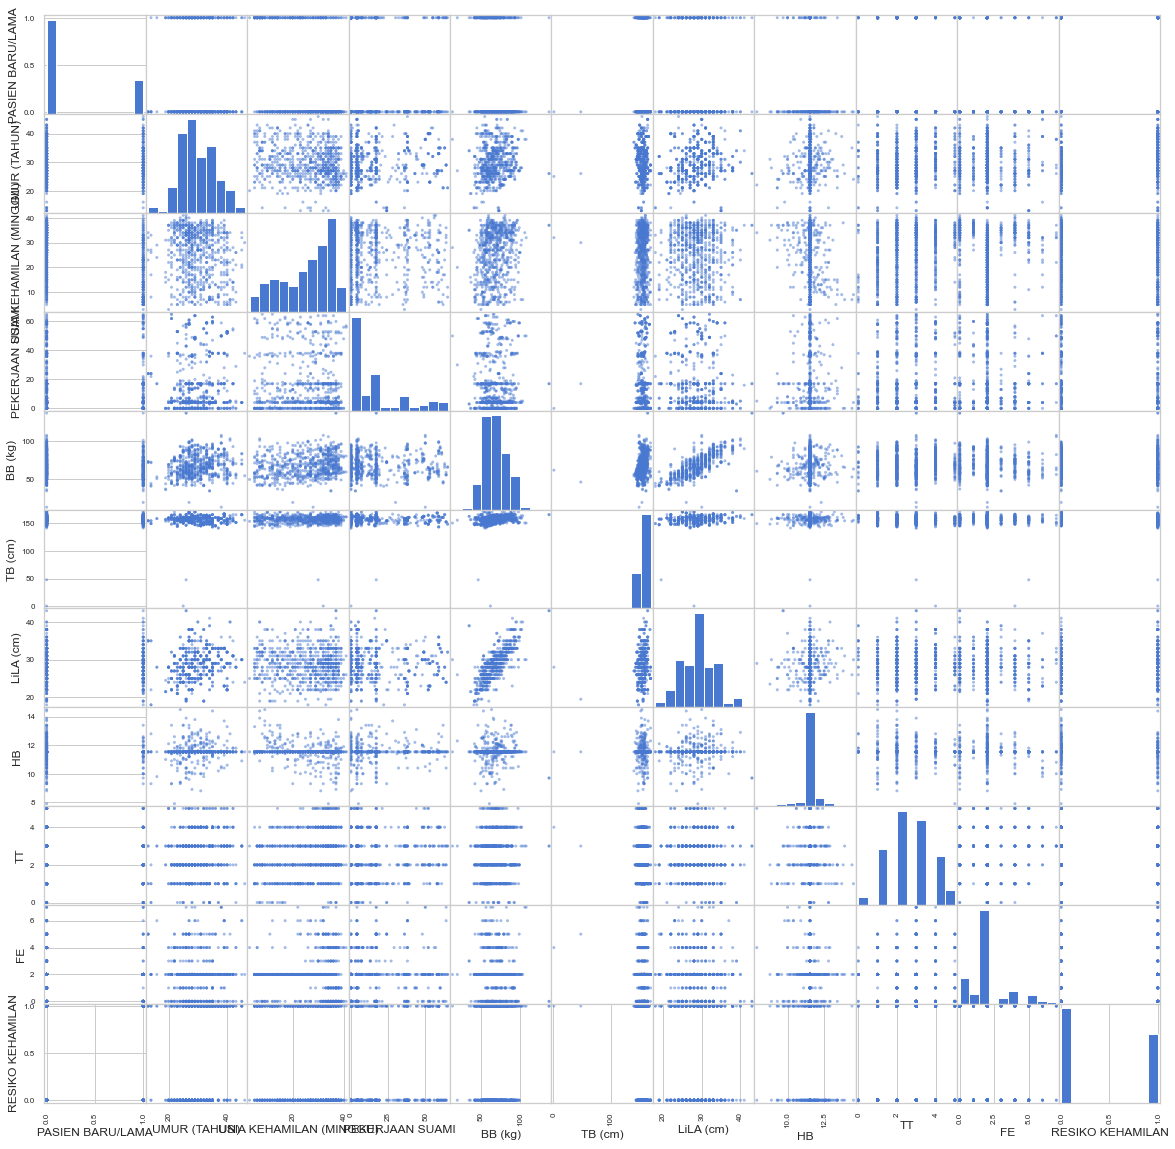

In [414]:
#Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

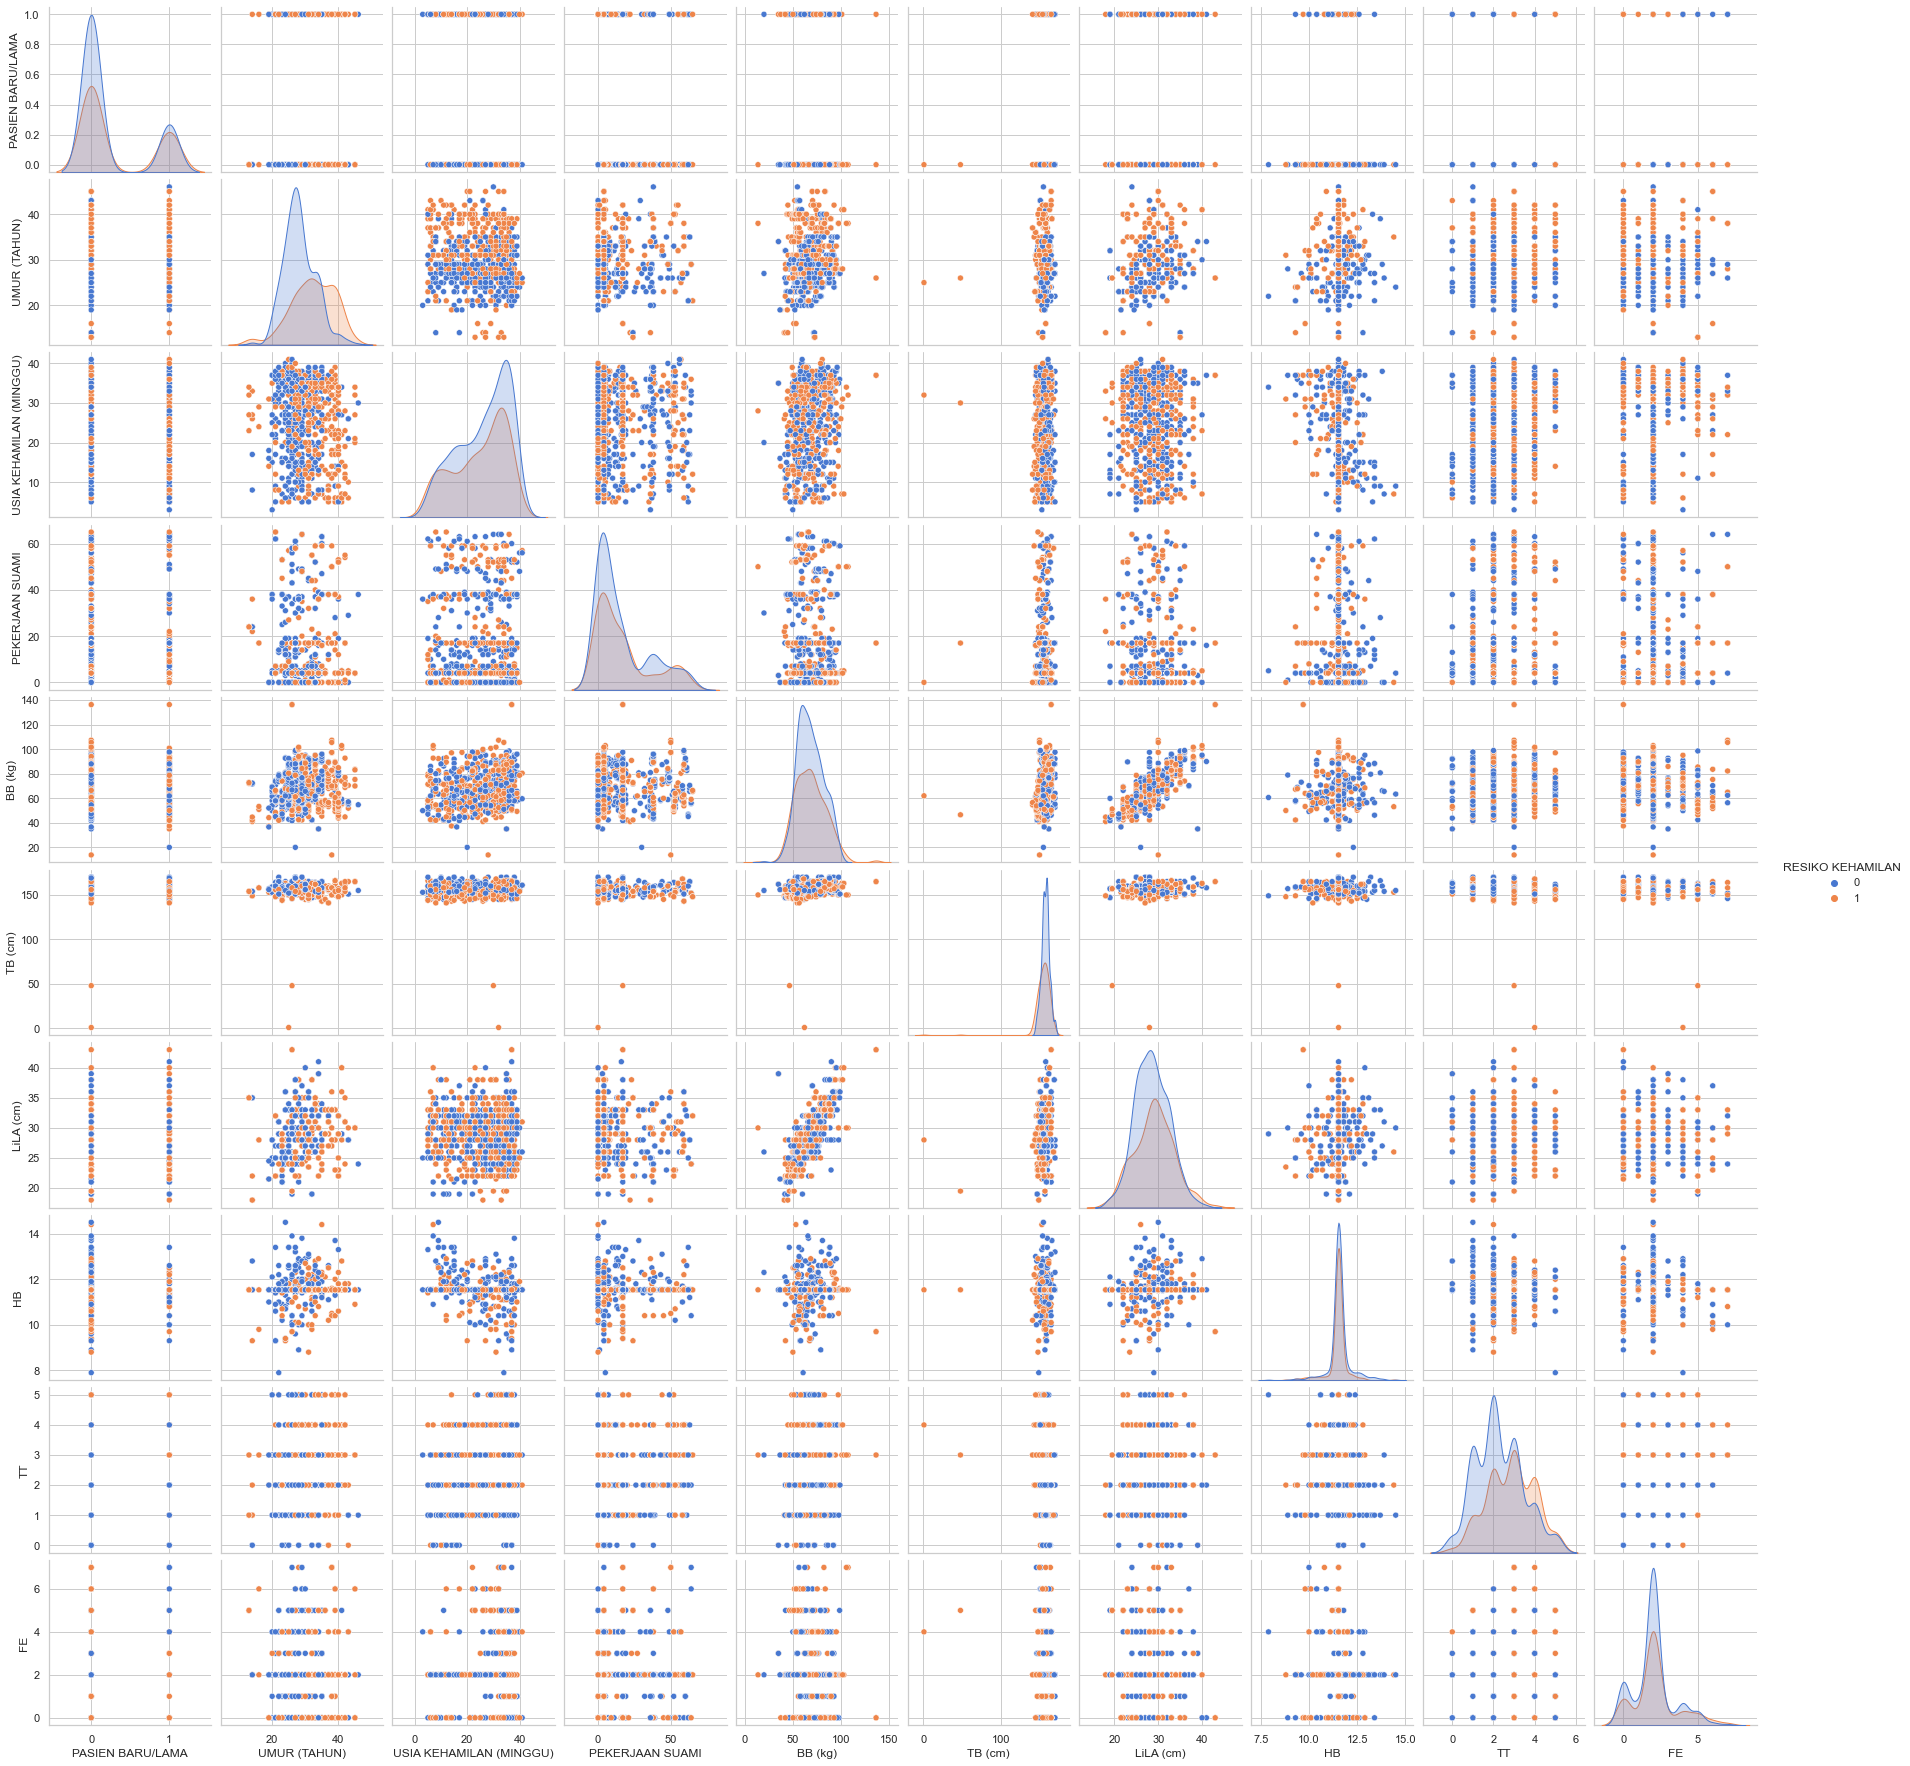

In [415]:
# Pairplot
sns.pairplot(data = dataset, hue = 'RESIKO KEHAMILAN')
plt.show()

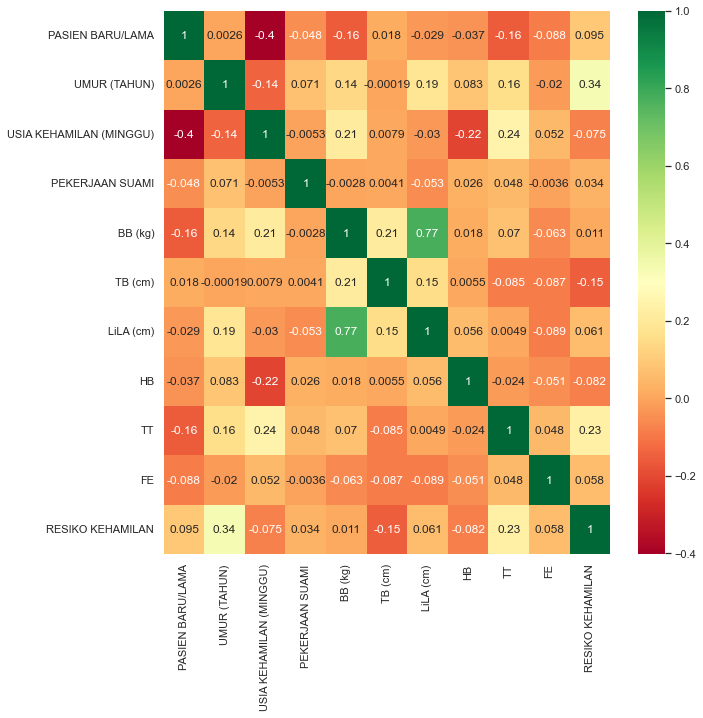

In [416]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

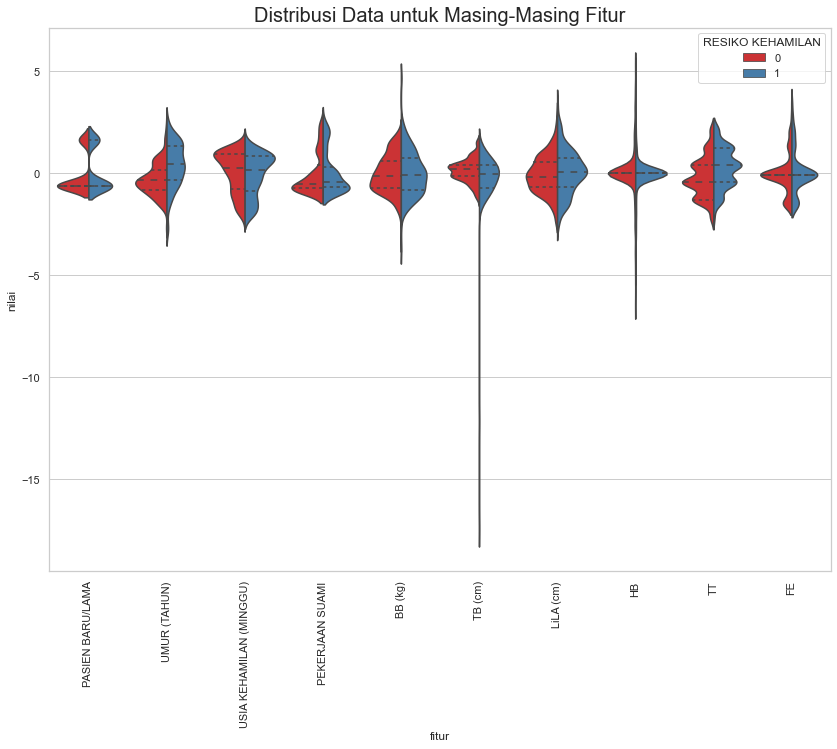

In [417]:
# visualisasi distribusi data untuk masing-masing fitur
sns.set(style='whitegrid', palette='muted')
data_keterangan = dataset['RESIKO KEHAMILAN']
data_features = dataset.drop(['RESIKO KEHAMILAN'], axis=1)
data_features_std = (data_features - data_features.mean()) / data_features.std()
data = pd.concat([data_keterangan, data_features_std], axis=1)
data = pd.melt(data, id_vars='RESIKO KEHAMILAN',
               var_name='fitur', value_name='nilai')
plt.figure(figsize=(14, 10))
sns.violinplot(x='fitur', y='nilai',
               hue='RESIKO KEHAMILAN', data=data, split=True,
               inner='quart', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribusi Data untuk Masing-Masing Fitur', fontsize=20)
plt.show()

## Normalize Data

In [418]:
target_name = 'RESIKO KEHAMILAN'
labels_dataset = dataset[target_name]
features_dataset = dataset.drop(target_name, axis=1)

In [419]:
features_dataset

,PASIEN BARU/LAMA,UMUR (TAHUN),USIA KEHAMILAN (MINGGU),PEKERJAAN SUAMI,BB (kg),TB (cm),LiLA (cm),HB,TT,FE
0,1,27,38,0,66.5,150.0,28.0,11.200000,5,0
1,0,28,37,1,78.9,157.0,30.0,8.900000,1,0
2,0,23,38,0,66.2,156.0,27.0,11.700000,2,1
3,0,24,25,0,78.2,163.0,28.0,11.534597,3,2
4,0,25,34,0,85.6,158.0,28.0,11.534597,0,0
5,0,22,38,0,76.8,170.0,27.0,11.534597,2,1
6,1,28,11,0,60.9,150.0,29.0,11.534597,1,2
7,0,32,36,2,63.0,161.0,26.0,10.600000,5,0
8,1,26,33,3,70.4,155.0,30.0,11.534597,1,3
9,1,34,35,3,35.0,162.0,39.0,11.534597,0,3


In [420]:
labels_dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
24     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     1
45     0
46     1
47     0
48     0
49     0
50     0
51     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     0
73     1
74     0
75     0
76     1
77     0
78     0
79     1
80     0
81     0
82     1
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     1
95     0
96     0
97     0
98     1
99     0
100    0
101    0
102    1
103    0
104    0
105    0
106    0
107    1
108    1
109    0
110    1
111    1
112    0
113    0
1

In [421]:
from sklearn.preprocessing import MinMaxScaler

features_dataset = MinMaxScaler().fit_transform(features_dataset)

## Train Test Split

In [422]:
from sklearn.model_selection import train_test_split

random_seed = 1000
train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=random_seed
)

In [423]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_features, train_labels)

GaussianNB()

In [424]:
train_score_c4 = nb.score(train_features, train_labels)
test_score_c4 = nb.score(test_features, test_labels)

print(f"Classical Naive Bayes on the training dataset: {train_score_c4:.2f}")
print(f"Classical Naive Bayes on the test dataset:     {test_score_c4:.2f}")

Classical Naive Bayes on the training dataset: 0.73
Classical Naive Bayes on the test dataset:     0.76


## Prediction

In [425]:
nb_pred = nb.predict(test_features)

In [426]:
from sklearn.metrics import accuracy_score

## Model Evaluation

In [427]:
#Train score & Test score of Naive-Bayes
print("Train Accuracy of Naive Bayes", nb.score(train_features, train_labels)*100)
print("Accuracy (Test) score of Naive Bayes", nb.score(test_features, test_labels)*100)
print("Accuracy score of Naive Bayes", accuracy_score(test_labels, nb_pred)*100)

Train Accuracy of Naive Bayes 73.20819112627987
Accuracy (Test) score of Naive Bayes 76.19047619047619
Accuracy score of Naive Bayes 76.19047619047619


## Confusion Matrix

Confusion Matrix adalah tabel yang digunakan untuk menggambarkan kinerja masalah klasifikasi.
Ini memvisualisasikan keakuratan classifier dengan membandingkan nilai prediksi dengan nilai sebenarnya.
Istilah yang digunakan dalam Confusion Matrix adalah True positive (TP), true negative (TN). positif palsu (FP) dan negatif palsu (FN)

- True Positive: Hasil yang diprediksi adalah positif, meskipun diberi label positif.

- False Positive: Hasil yang diprediksi adalah positif, meskipun diberi label negatif. Itu juga menyebut Kesalahan Tipe I.

- False Negative: Hasil yang diprediksi adalah negatif, meskipun diberi label positif. Itu juga menyebut Kesalahan Tipe II.

- True Negative: Hasil prediksi negatif, sementara itu diberi label negatif.

In [428]:
from sklearn.metrics import classification_report,confusion_matrix
# Confusion Matrix of Naive Bayes
cm_nb = confusion_matrix(test_labels,nb_pred)
cm_nb

array([[66, 13],
       [22, 46]], dtype=int64)

<AxesSubplot:>

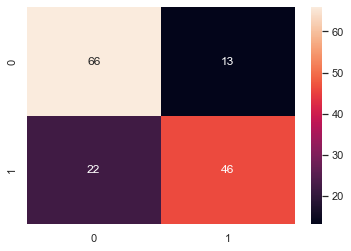

In [429]:
sns.heatmap(confusion_matrix(test_labels,nb_pred),annot=True,fmt="d")

In [430]:
TN = cm_nb[0,0]
FP = cm_nb[0,1]
FN = cm_nb[1,0]
TP = cm_nb[1,1]

In [431]:
TN, FP, FN, TP

(66, 13, 22, 46)

In [432]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve 
cm_nb = confusion_matrix(test_labels, nb_pred)

print('TN - True Negative {}'.format(cm_nb[0,0])) 
print('FP - False Positive {}'.format(cm_nb[0,1]))
print('FN - False Negative {}'.format(cm_nb[1,0]))
print('TP - True Positive {}'.format(cm_nb[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_nb[0,0],cm_nb[1,1]]),np.sum(cm_nb))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm_nb[0,1],cm_nb[1,0]]),np.sum(cm_nb))*100))

TN - True Negative 66
FP - False Positive 13
FN - False Negative 22
TP - True Positive 46
Accuracy Rate: 76.19047619047619
Misclassification Rate: 23.809523809523807


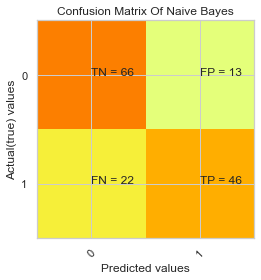

In [433]:
plt.clf()
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Wistia) 
classNames = ['0','1']
plt.title('Confusion Matrix Of Naive Bayes')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN' , 'FP'], ['FN' , 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_nb[i][j]))

In [434]:
pd.crosstab(test_labels, nb_pred, margins=False)

col_0,0,1
RESIKO KEHAMILAN,,
0,66,13
1,22,46


In [435]:
pd.crosstab(test_labels, nb_pred, margins=True)

col_0,0,1,All
RESIKO KEHAMILAN,,,
0,66,13,79
1,22,46,68
All,88,59,147


In [436]:
pd.crosstab(test_labels, nb_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,66,13,79
1,22,46,68
All,88,59,147


In [437]:
TP,FP

(46, 13)

In [438]:
Precision = TP/(TP+FP)
Precision

0.7796610169491526

In [439]:
# print precision score

precision_Score_nb = TP / float(TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score_nb))

Precision score: 77.9661


In [440]:
from sklearn.metrics import precision_score

print("precision Score is:", precision_score (test_labels, nb_pred)*100)
print("Mircro Average precision Score is:", precision_score(test_labels, nb_pred, average='micro')*100)
print("Marcro Average precision Score is:", precision_score (test_labels, nb_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (test_labels, nb_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score(test_labels, nb_pred, average=None)*100)

precision Score is: 77.96610169491525
Mircro Average precision Score is: 76.19047619047619
Marcro Average precision Score is: 76.48305084745763
Weighted Average precision Score is: 76.37207425343018
precision Score on Non weighted score is: [75.         77.96610169]


In [441]:
print('Classification Report of Naive Bayes: \n',classification_report(test_labels, nb_pred, digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.7500    0.8354    0.7904        79
           1     0.7797    0.6765    0.7244        68

    accuracy                         0.7619       147
   macro avg     0.7648    0.7560    0.7574       147
weighted avg     0.7637    0.7619    0.7599       147



In [442]:
recall_score_nb = TP / float(TP + FN)*100
print('recall score', recall_score_nb)

recall score 67.64705882352942


In [443]:
TP,FN

(46, 22)

In [444]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity score :',recall_score(test_labels,nb_pred)*100)

Recall or Sensitivity score : 67.64705882352942


In [445]:
print("Mircro Average Recall Score is", recall_score(test_labels, nb_pred, average='micro')*100)
print("Marcro Average Recall Score is", recall_score(test_labels, nb_pred, average='macro')*100)
print("Weighted Average Recall Score is:", recall_score(test_labels, nb_pred, average='weighted')*100)
print("Recall Score on Non weighted score is:", recall_score(test_labels, nb_pred, average=None)*100)

Mircro Average Recall Score is 76.19047619047619
Marcro Average Recall Score is 75.59568131049889
Weighted Average Recall Score is: 76.19047619047619
Recall Score on Non weighted score is: [83.5443038  67.64705882]


In [446]:
print('Classification Report of Naive Bayes: \n',classification_report(test_labels,
                                                                       nb_pred,digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.7500    0.8354    0.7904        79
           1     0.7797    0.6765    0.7244        68

    accuracy                         0.7619       147
   macro avg     0.7648    0.7560    0.7574       147
weighted avg     0.7637    0.7619    0.7599       147



In [447]:
FPR_nb = FP / float(FP + TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR_nb))

False Positive Rate: 16.4557


In [448]:
FP, TN

(13, 66)

In [449]:
specificity_nb = TN / (TN + FP)*100
print('Specificity: {0:0.4f}'.format(specificity_nb))

Specificity: 83.5443


In [450]:
from sklearn.metrics import f1_score
f1_score_nb = f1_score(test_labels, nb_pred)*100
print("f1_score of macro :",f1_score_nb)

f1_score of macro : 72.44094488188976


In [451]:
print("Mircro Average F1 Score is:", f1_score(test_labels, nb_pred, average='micro')*100)
print("Marcro Average F1 Score is:", f1_score(test_labels, nb_pred, average='macro')*100)
print("Weighted Average F1 Score is:", f1_score(test_labels, nb_pred, average='weighted')*100)
print("F1 Score on Non weighted score is:", f1_score(test_labels, nb_pred, average=None)*100)

Mircro Average F1 Score is: 76.19047619047619
Marcro Average F1 Score is: 75.74143052477721
Weighted Average F1 Score is: 75.98840564091165
F1 Score on Non weighted score is: [79.04191617 72.44094488]


In [452]:
from sklearn.metrics import classification_report
print('Classification Report of Naive Bayes: \n', classification_report(test_labels,
                                                                        nb_pred,digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.7500    0.8354    0.7904        79
           1     0.7797    0.6765    0.7244        68

    accuracy                         0.7619       147
   macro avg     0.7648    0.7560    0.7574       147
weighted avg     0.7637    0.7619    0.7599       147



In [453]:
# Area Under Curve 
auc_nb = roc_auc_score(test_labels, nb_pred)
print("ROC AUC SCORE of Naive Bayes is", auc_nb)

ROC AUC SCORE of Naive Bayes is 0.7559568131049889


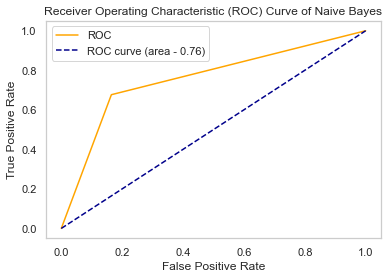

In [454]:
fpr, tpr, thresholds = roc_curve(test_labels, nb_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area - %0.2f)' % auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bayes')
plt.legend()
plt.grid()
plt.show()